# <center>Classifying fashion images on the MNIST data<center>
    
<center>Created by Zsófia Rebeka Katona<center>
<center>Data Science 2 - Assignment 2<center>

    
---
The goal of this assignment was to correctly classify the images of Zalando's articles from the fashion MNIST dataset. The task was to correctly classify the images into one of the ten categories through building deeper and more complex neural network models to predict the items. I also evaluated how well these models perform through analyzing accuracy, lost and MSE scores.

### What would be an appropriate metric to evaluate your models? Why?
---
There are several ways to evaluate predictive models. However, the most appropriate metric could be using accuracy. Accuracy is important, as it shows the level of reliability and effectiveness of the predictive models. If we obtain a validation set during data splitting, we could also use validation accuracy, which tells us how well the models generalize to unseen data. Accuracy serves as a good indicator in predictive modeling, because it provides a clear indication of the model's ability to correctly classify instances, especially where the cost of misclassification is high.

### Getting the data and showing some example images from the data
---

In [89]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Rescaling
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [74]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Converting the output to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20240405)

print(f"Size of training sets: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Size of validation sets: X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"Size of test sets: X_test:  {X_test.shape}, y_test:  {y_test.shape}")

Size of training sets: X_train: (48000, 28, 28), y_train: (48000, 10)
Size of validation sets: X_val:   (12000, 28, 28), y_val:   (12000, 10)
Size of test sets: X_test:  (10000, 28, 28), y_test:  (10000, 10)


Training images:


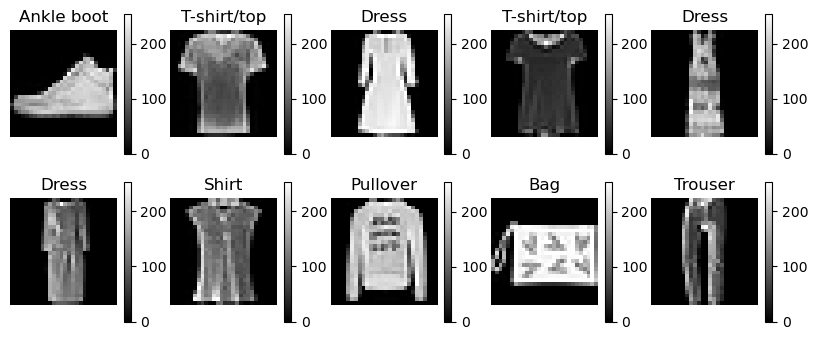

Validation images:


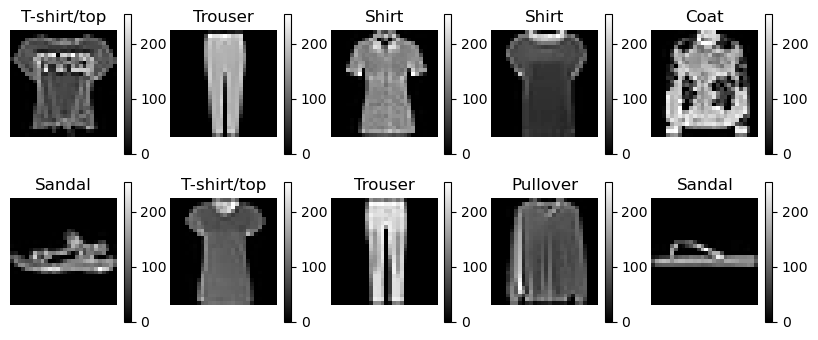

Test images:


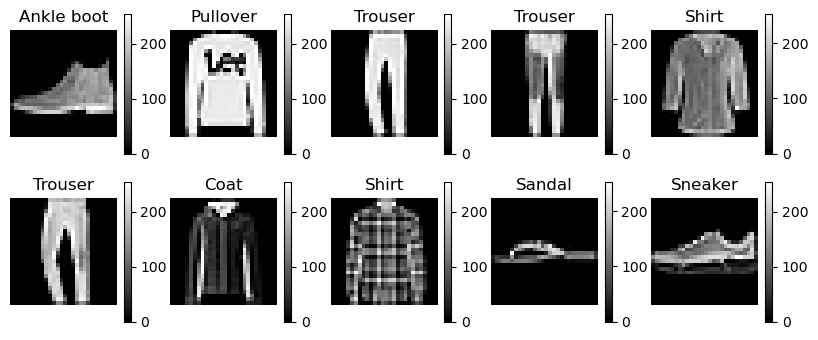

In [75]:
# Defining class names for the labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Labelling the items with the clothing names
clothing_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Creating a list of datasets and their corresponding titles
datasets = [(X_train, y_train, "Training Images"), (X_val, y_val, "Validation Images"), (X_test, y_test, "Test Images")]

# Iterating over the training, validation and test datasets
def show_images(images, labels, nrows = 1, ncols = 5, class_names = None):
    """"Display the images and their labels"""
    plt.figure(figsize = (10, 2 * nrows))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap = "gray")
        plt.colorbar()
        if class_names is not None:
            plt.title(class_names[np.argmax(labels[i])])
        else:
            plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

# Printing the images
print("Training images:")
show_images(X_train, y_train, nrows = 2, ncols = 5, class_names = class_names)

print("Validation images:")
show_images(X_val, y_val, nrows = 2, ncols = 5, class_names = class_names)

print("Test images:")
show_images(X_test, y_test, nrows = 2, ncols = 5, class_names = class_names)

### Training a simple fully connected single hidden layer network to predict the items and providing a plot to the training history

In [4]:
# Building a simple fully connected hidden layer network
model = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
print(model.summary())

C:\Users\Zsófi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7800 - loss: 0.6337 - val_accuracy: 0.8501 - val_loss: 0.4159
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8577 - loss: 0.3898 - val_accuracy: 0.8632 - val_loss: 0.3736
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8764 - loss: 0.3402 - val_accuracy: 0.8589 - val_loss: 0.3883
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8851 - loss: 0.3176 - val_accuracy: 0.8760 - val_loss: 0.3400
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8928 - loss: 0.2912 - val_accuracy: 0.8733 - val_loss: 0.3510
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8995 - loss: 0.2751 - val_accuracy: 0.8882 - val_loss: 0.3104
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9038 - loss: 0.2614 - val_accuracy: 0.8868 - val_loss: 0.3153
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9091 - loss: 0.2467 -

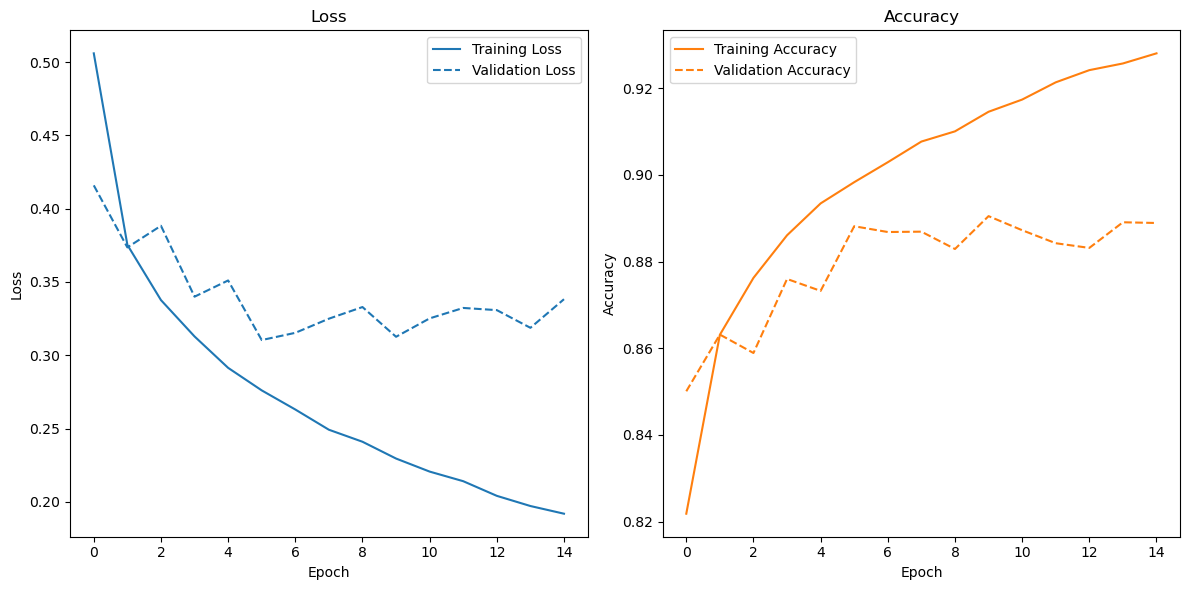

In [5]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Defining a function to plot history
def plot_history(history):
    """
    Plot training and validation loss, and accuracy for the given history.

    Args:
    - history: History object returned by the model.fit() method.

    Returns:
    - None
    """
    color_palette = ['#1f77b4', '#ff7f0e']
    plt.figure(figsize=(12, 6))

    # Plotting the training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color=color_palette[0])
    plt.plot(history.history['val_loss'], label='Validation Loss', color=color_palette[0], linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color=color_palette[1])
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color=color_palette[1], linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.tight_layout()
    plt.show()

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history)

The plot illustrates that the training loss in the first model is consistently decreasing. This is true for the rest of the models in this analysis. Initially, both the training and validation loss decrease steadily, indicating that the model is learning and improving its performance on both the training and validation datasets. Around the 4th epoch the validation loss starts to level off, suggesting that the model's improvement on the validation data is slowing down. This suggests that the model starts to overfit to the training data. Despite the validation loss leveling off, the training loss continues to decrease, showing that the model is still learning from the training data. While the training accuracy continues to increase over the epochs, as of the 4th epoch, the validation accuracy remains around 0.88. Due to the EarlyStopping, the model stops at an earlier, indicating that the model's performance on validation model has reached its peak.

### Experimenting with different network architectures and settings
---

### Model 2
#### Adding a Dropout layer
---

In [6]:
# Setting the network
model_2 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    # Adding a Dropout of 0.5
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7309 - loss: 0.7590 - val_accuracy: 0.8515 - val_loss: 0.4122
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8318 - loss: 0.4684 - val_accuracy: 0.8525 - val_loss: 0.3918
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8436 - loss: 0.4299 - val_accuracy: 0.8604 - val_loss: 0.3729
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8466 - loss: 0.4162 - val_accuracy: 0.8618 - val_loss: 0.3740
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8579 - loss: 0.3860 - val_accuracy: 0.8737 - val_loss: 0.3448
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8675 - loss: 0.3717 - val_accuracy: 0.8749 - val_loss: 0.3469
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8668 - loss: 0.3638 - val_accuracy: 0.8745 - val_loss: 0.3429
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8689 - loss: 0.3578 - 

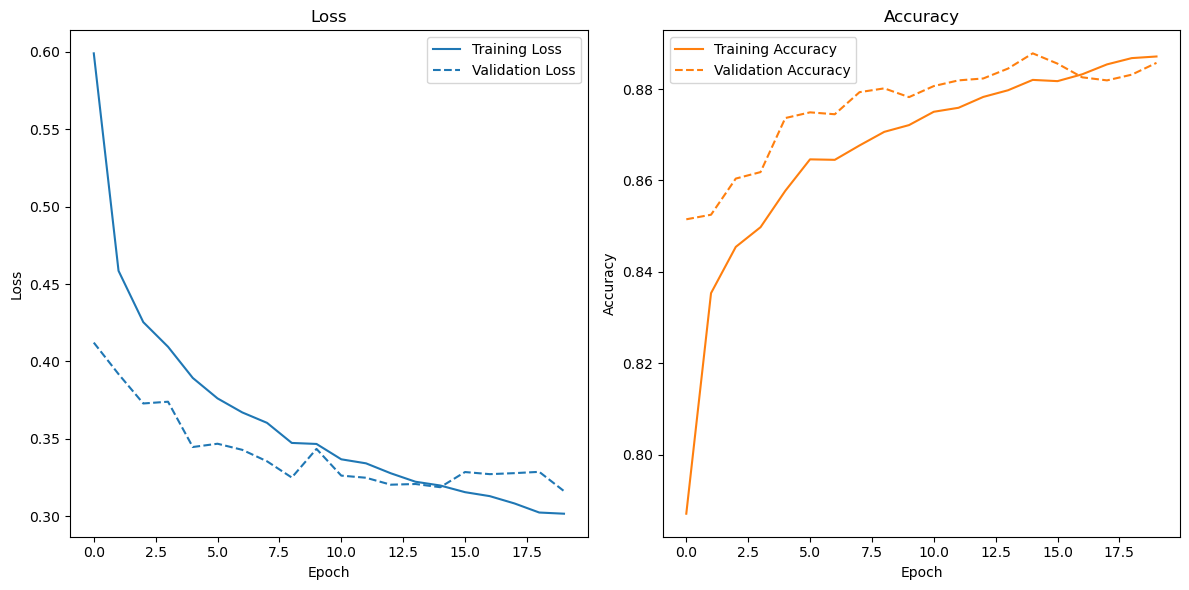

In [7]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_2 = model_2.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_2)

By adding a 0.5 Dropout layer, we dropped a unit at training time with a 0.5 probability, which resulted in the decrease of both the training and validation loss. This indicates that the dropout regulated the model and prevented it from overfitting. The validation loss being lower than training loss, which can also be the result of the droput as it the training loss is calculated with the dropout. The fluctuatiation in the validation loss after the 4th epoch likely to show that the model is adjusting to the dropout regularization and finding a better balance between fitting the training data and regularizing and generalizing to unseen validation data. Unlike the other models, the validation accuracy is predominantly higher than the training accuracy. The similar scores suggest that while this model is still overfitting, it's performing consistently on both datasets. Due to EarlyStopping, the model stops at an earlier epoch.

### Model 3
#### Increasing the number of nodes in the hidden layer
---

In [8]:
# Setting the network
model_3 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    # Increasing the number of nodes from 256 to 512
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7819 - loss: 0.6204 - val_accuracy: 0.8585 - val_loss: 0.3891
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8634 - loss: 0.3730 - val_accuracy: 0.8634 - val_loss: 0.3715
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8778 - loss: 0.3290 - val_accuracy: 0.8708 - val_loss: 0.3703
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8855 - loss: 0.3041 - val_accuracy: 0.8720 - val_loss: 0.3434
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8936 - loss: 0.2837 - val_accuracy: 0.8858 - val_loss: 0.3154
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9004 - loss: 0.2669 - val_accuracy: 0.8789 - val_loss: 0.3297
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9051 - loss: 0.2580 - val_accuracy: 0.8808 - val_loss: 0.3366
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9097 - loss: 0

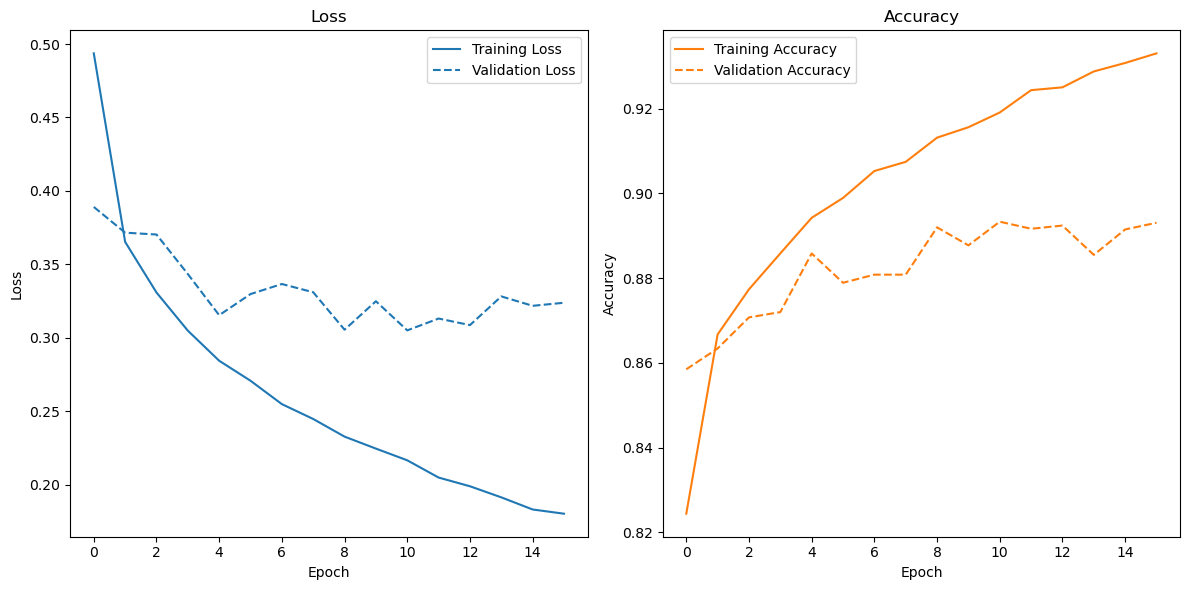

In [9]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_3 = model_3.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_3)

The third model exhibits a similar behaviour to the first model, where the training loss gradually decreases and the validation loss levels off at an earlier epoch. The validation loss begins to level off when the loss reaches 0.33, indicating where the model's improvement on the validation data is slowing down. In theory, by adding more nodes, we increase the capacity of the model to learn with more training data. But in practice, by adding double the amount of nodes to the first hidden layer, the model might have become too complex, leading to overfitting. This increased complexity allows the model to capture more intricate patterns in the training data but perhaps also results in memorization of noise, decreasing its performance. However, the final training loss decreases further than the loss in the previous models, which can be the result of the increased node sizes.

### Model 4
#### Adding another hidden layer with a sigmoid activation function and the same number of nodes as the first layer
---

In [10]:
# Setting the network
model_4 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    # Adding another hidden layer with a sigmoid activation function
    Dense(256, activation = 'sigmoid'),
    Dense(10, activation='softmax')
])

# Compiling the model
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7666 - loss: 0.6729 - val_accuracy: 0.8413 - val_loss: 0.4449
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8623 - loss: 0.3759 - val_accuracy: 0.8700 - val_loss: 0.3537
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8796 - loss: 0.3271 - val_accuracy: 0.8799 - val_loss: 0.3312
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8907 - loss: 0.2950 - val_accuracy: 0.8779 - val_loss: 0.3320
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8947 - loss: 0.2815 - val_accuracy: 0.8765 - val_loss: 0.3284
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9018 - loss: 0.2633 - val_accuracy: 0.8852 - val_loss: 0.3112
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9067 - loss: 0.2496 - val_accuracy: 0.8899 - val_loss: 0.3010
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9098 - loss: 0.2392 - 

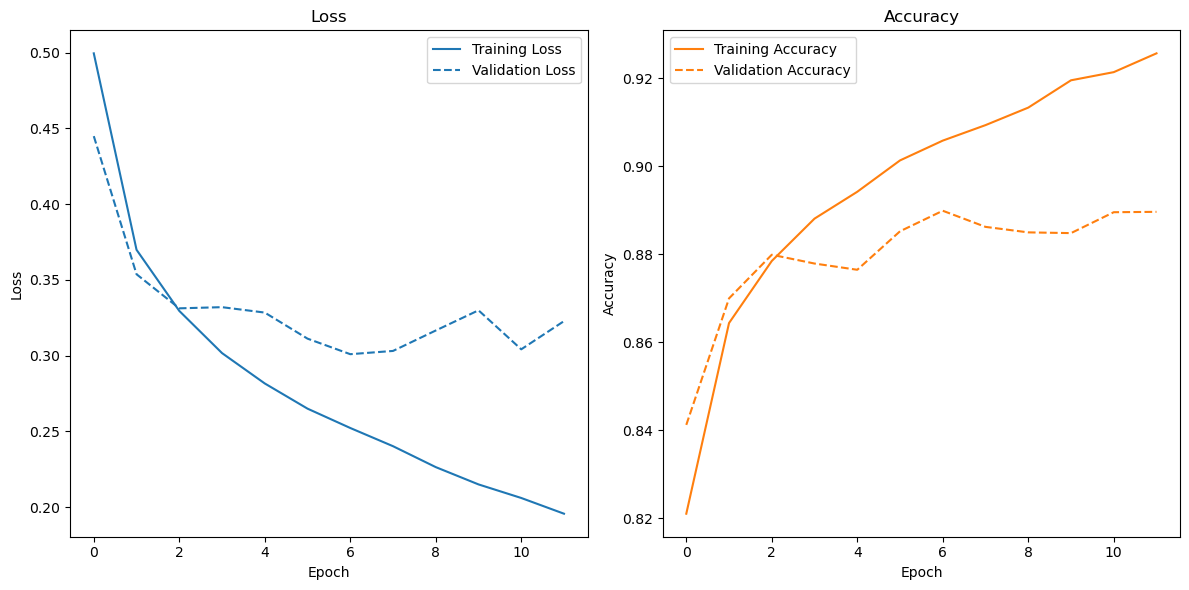

In [11]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_4 = model_4.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_4)

The fourth model obtains two hidden layers, one with a relu and the other with a sigmoid activation function, each containing 256 nodes. The fourth model exhibits a similar behaviour to the first and the third model. The training loss gradually decreases, while the validation loss levels off at an earlier epoch. This indicates that by adding another, more trainable parameter with the sigmoid activation function doesn't improve the model's performance. Moreover, it makes the model architecture too complex, leading to overfitting. Despite achieving a high training accuracy score, the validation loss is still performing similarly to the previous models. This serves as another reason that the extra layer leads to overfitting. The EarlyStopping is only triggered at a later epoch, suggesting that the model required more iterations to find its peak.

### Model 5
#### Combining the previous additions: Increasing the number of nodes, adding a dropout, another hidden layer and a learning rate to adam
---

In [12]:
# Setting the network
model_5 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    # Doubling the number of nodes with ReLU activation function
    Dense(512, activation='relu'),
    # Adding another layer with the sigmoid function
    Dense(256, activation = 'sigmoid'),
    # Adding a Dropout of 0.5
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Setting the learning rate for the adam optimizer
adam_optimizer = Adam(learning_rate=0.001)

# Compiling the model
model_5.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_5.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7345 - loss: 0.7395 - val_accuracy: 0.8585 - val_loss: 0.3945
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8528 - loss: 0.4020 - val_accuracy: 0.8678 - val_loss: 0.3595
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8699 - loss: 0.3544 - val_accuracy: 0.8698 - val_loss: 0.3503
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8801 - loss: 0.3222 - val_accuracy: 0.8754 - val_loss: 0.3244
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8875 - loss: 0.3078 - val_accuracy: 0.8798 - val_loss: 0.3177
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8949 - loss: 0.2835 - val_accuracy: 0.8775 - val_loss: 0.3187
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8983 - loss: 0.2701 - val_accuracy: 0.8869 - val_loss: 0.3129
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9036 - loss: 0

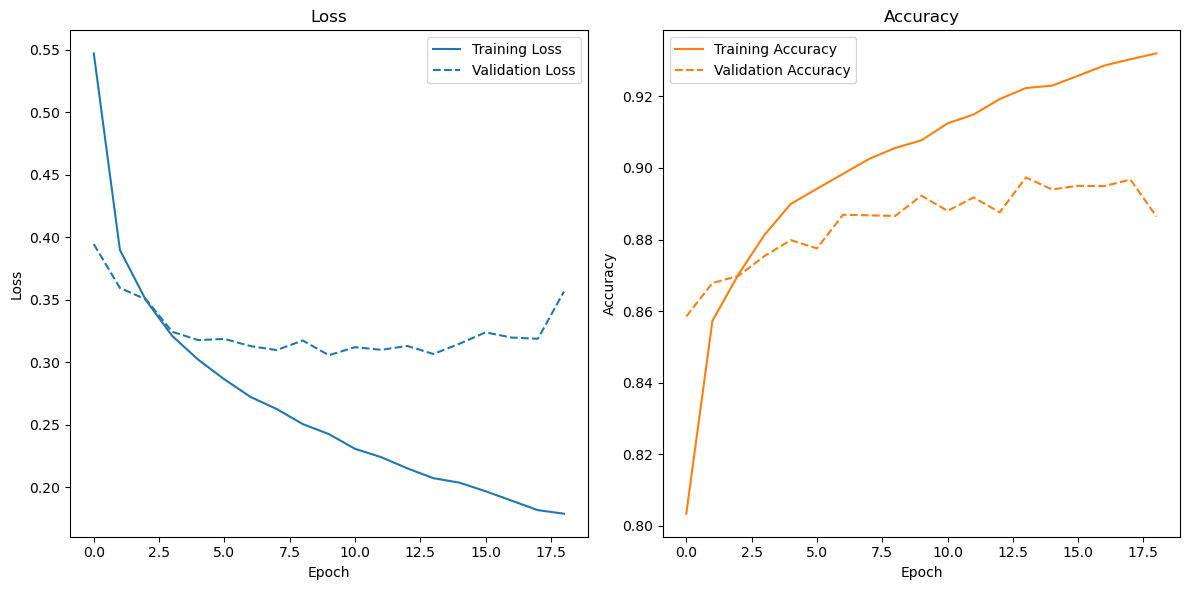

In [13]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_5 = model_5.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_5)

According to the plot and the accuracy scores, combining all the features of the previous models doesn't improve the model significantly. While we can see a higher training accuracy, the 4th model validation accuracy overranks this model's validation accuracy. The plot exhibits a similar trend in terms of training and validaiton loss. The validation loss begins to level off at an earlier epoch, suggesting overfitting. Combining a higher number of nodes, adding a dropout layer and adding another hidden layer resulted in a lower validation loss, but also in lower accuracies. This suggests that the model architecture might have become too complex.

### Trying to improve the accuracy of our models by using convolution
---

### Model 6
#### Increased depth
---

In [14]:
# Setting the network
model_6 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    # Convolutional layer with 32 filters and a 3x3 kernel size
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters and a 3x3 kernel size
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Convolutional layer with 128 filters and a 3x3 kernel size,
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    # Dense (fully connected) layer with 128 neurons
    Dense(128, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_6.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6824 - loss: 0.8653 - val_accuracy: 0.8488 - val_loss: 0.4049
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8553 - loss: 0.4030 - val_accuracy: 0.8746 - val_loss: 0.3425
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8781 - loss: 0.3438 - val_accuracy: 0.8972 - val_loss: 0.2794
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8939 - loss: 0.2963 - val_accuracy: 0.8965 - val_loss: 0.2820
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9049 - loss: 0.2672 - val_accuracy: 0.9018 - val_loss: 0.2683
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9119 - loss: 0.2430 - val_accuracy: 0.9053 - val_loss: 0.2593
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9202 - loss: 0.2201 - val_accuracy: 0.9052 - val_loss: 0.2601
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9273 -

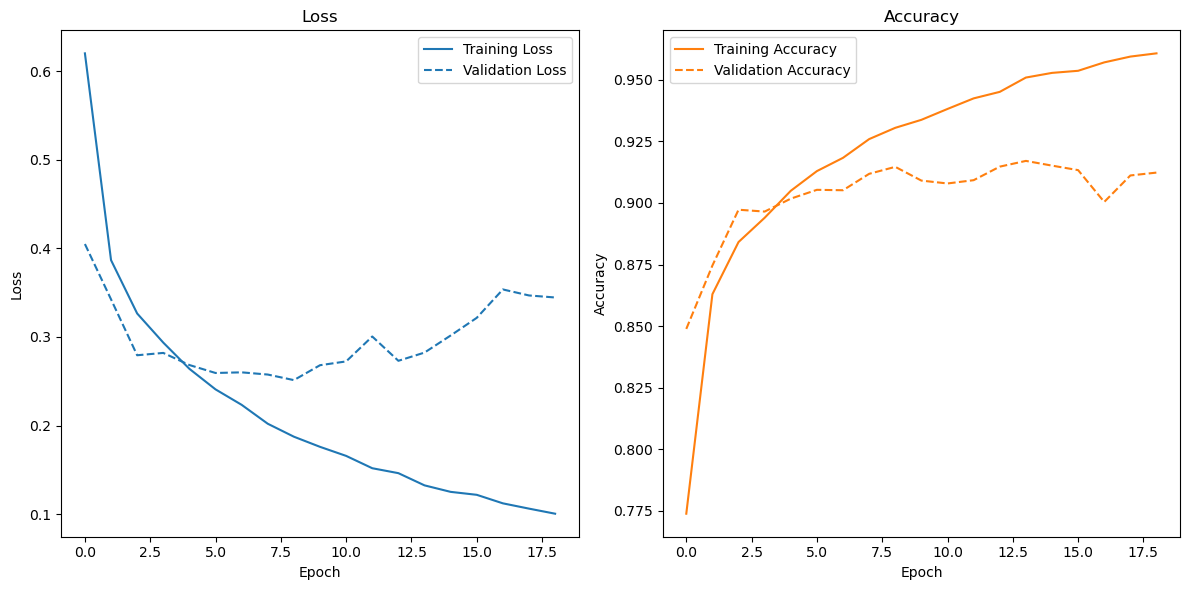

In [15]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_6 = model_6.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_6)

The model consists of three convolutional layers followed by max pooling layers to extract features, followed by a flatten layer to convert the 2D feature maps into a vector. It then includes a dense layer with 128 neurons and a ReLU activation function, along with a dropout layer. By adding more convolutional layers, I sort of regularized the model and enhanced its ability to learn discriminative features from input images. By adding MaxPooling, I aimed to reduce dimensionality, which can also prevent overfitting. 

Despite the training loss decreasing, the validation loss begins to increase at an early epoch and the EarlyStopping callback is triggered too, indicating potential overfitting. However, by adding convolutional layers, the model's accuracy scores visibly improve, indicating good generalization performance.

### Model 7
#### Increased Width
---

In [16]:
# Setting the network
model_7 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    # Convolutional layer with 32 filters and a 3x3 kernel size
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters and a 3x3 kernel size
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense layers with 512, 256, and 128 neurons respectively, with relu activation
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_7.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,004,042 (3.83 MB)

 Trainable params: 1,004,042 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7291 - loss: 0.7424 - val_accuracy: 0.8769 - val_loss: 0.3411
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8815 - loss: 0.3361 - val_accuracy: 0.8923 - val_loss: 0.2965
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9033 - loss: 0.2741 - val_accuracy: 0.8985 - val_loss: 0.2835
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9138 - loss: 0.2364 - val_accuracy: 0.9086 - val_loss: 0.2509
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9280 - loss: 0.1994 - val_accuracy: 0.9046 - val_loss: 0.2571
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9352 - loss: 0.1792 - val_accuracy: 0.8988 - val_loss: 0.3010
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9422 - loss: 0.1569 - val_accuracy: 0.9065 - val_loss: 0.2876
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9496 -

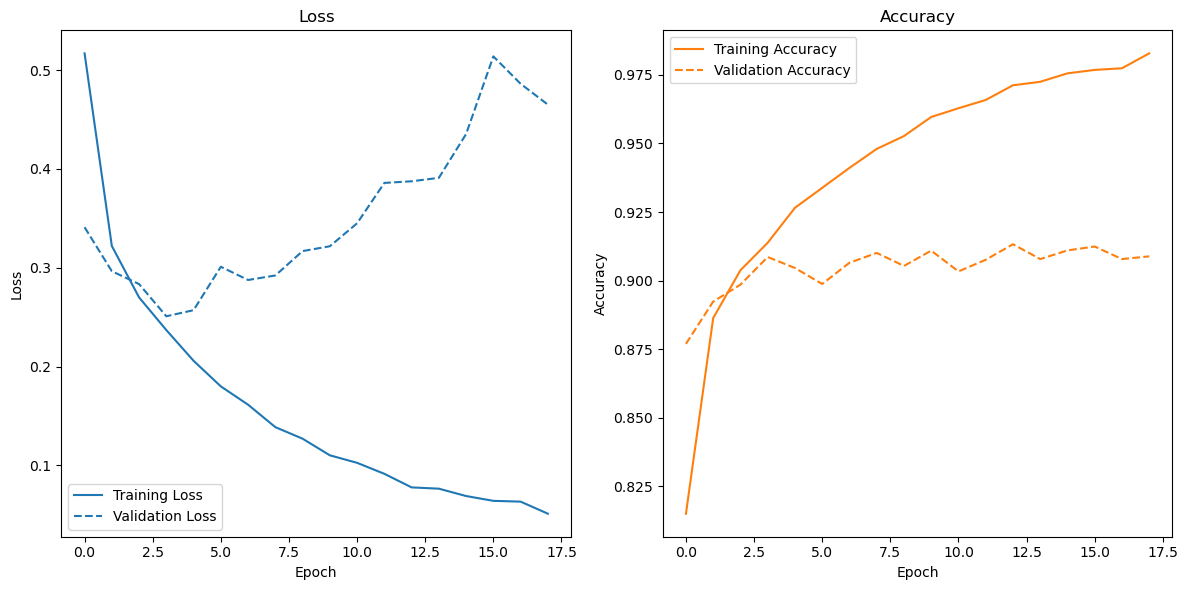

In [17]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_7 = model_7.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_7)

The 7th model obtains an increased width: it consists of three dense layers with 512, 256, and 128 neurons respectively, all using the ReLU activation function. The validation loss levels out earlier than the previous models and the EarlyStopping is triggered early on too. This indicates and the early levelling out indicate that the model may be prone to overfitting the training data, as it quickly reaches its peak performance on the validation set and doesn't improve further with additional epochs. Moreover, the increase in the validation loss suggests that the model may not generalize well to unseen data.

### Model 8
#### Increased Depth and Width
---

In [18]:
# Setting the network
model_8 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense layers with 512 neurons, with relu activation
    Dense(512, activation='relu'),
    # Dropout layer of 0.7 to reduce overfitting
    Dropout(0.4),
    # Dense layer with 256 neurons, with relu activation
    Dense(256, activation='relu'),
    # Dropout layer of 0.7 to reduce overfitting
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_8.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 972,426 (3.71 MB)

 Trainable params: 972,426 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 43ms/step - accuracy: 0.7184 - loss: 0.7571 - val_accuracy: 0.8702 - val_loss: 0.3467
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.8677 - loss: 0.3638 - val_accuracy: 0.8907 - val_loss: 0.3042
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 48ms/step - accuracy: 0.8880 - loss: 0.3033 - val_accuracy: 0.8950 - val_loss: 0.2722
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 41ms/step - accuracy: 0.8993 - loss: 0.2711 - val_accuracy: 0.8993 - val_loss: 0.2666
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.9108 - loss: 0.2433 - val_accuracy: 0.9012 - val_loss: 0.2757
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9188 - loss: 0.2220 - val_accuracy: 0.9030 - val_loss: 0.2560
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 50ms/step - accuracy: 0.9225 - loss: 0.2056 - val_accuracy: 0.9022 - val_loss: 0.2631
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 46ms/step - accuracy: 0.9265 -

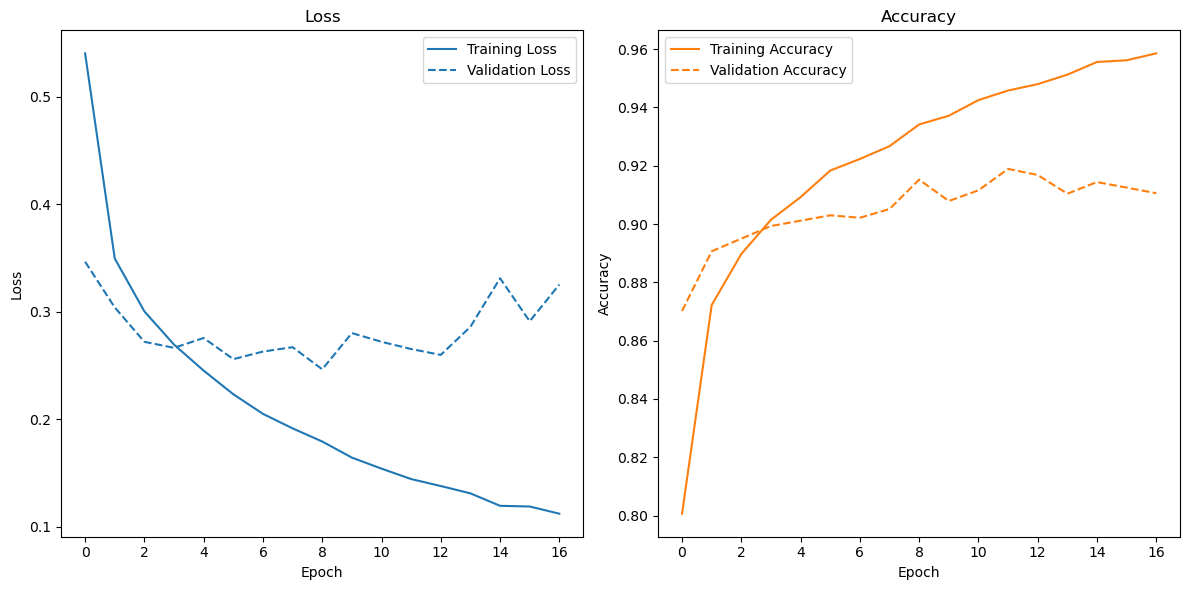

In [19]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_8 = model_8.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_8)

In this model, I combined the increased width with increased depth, adding two convolutional layers, two hidden layers wiuth ReLU, and two dropout layers with 0.4 probability. Similary to the 7th model, the validation loss levels out at an early epoch. The training accuracy is lower than the training accuracy of the 7th model. In this model, the validation loss doesn't increase as much as in the other models in the later epochs, suggesting  that the model's generalization capability to unseen data might be slightly better compared to previous models, despite its lower training accuracy.

### Trying to use a pre-trained network to improve accuracy
---

I opted to use padding to resize the images as I had kernel shape issues with scikitlearn's resize package. After resizing the images to 32, 32, 3 dimension, I used the MobileNetV2 pretrained image dataset on my model. I built a simple model to avoid overfitting, consisting of a global average pooling, one hidden layer with relu and a dropout layer with a probability of 0.5.

In [78]:
def pad_images(images):

    if images.ndim == 3:
        images = images[..., tf.newaxis]

    # 2 pixels on top, bottom, left, and right, and no padding on the batch and channels
    padding = [[0, 0], [2, 2], [2, 2], [0, 0]]
    
    # applying constant padding
    images_padded = tf.pad(images, paddings=padding, mode='CONSTANT', constant_values=0)
    return images_padded

X_train_padded = pad_images(X_train)
X_val_padded = pad_images(X_val)

In [90]:
# Defining a base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3), alpha = 1.0)

# Freezing the base model layers
base_model.trainable = False

# Setting the pretrained network
model_9 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print(model_9.summary())

# Compiling the pretrained model
model_9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Zsófi\AppData\Local\Temp\ipykernel_14784\1884695038.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3), alpha = 1.0)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [91]:
# converting images to rgb
def convert_to_rgb(images):
    images_rgb = tf.repeat(images, 3, axis=-1)
    return images_rgb

X_train_rgb = convert_to_rgb(X_train_padded)
x_val_rgb = convert_to_rgb(X_val_padded)

In [92]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Fitting the model
history_9 = model_9.fit(X_train_rgb, y_train, epochs=10,validation_data=(x_val_rgb, y_val), callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 174s 108ms/step - accuracy: 0.4360 - loss: 1.5525 - val_accuracy: 0.5291 - val_loss: 1.2651
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 224s 123ms/step - accuracy: 0.5199 - loss: 1.2840 - val_accuracy: 0.5428 - val_loss: 1.2223
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 201s 134ms/step - accuracy: 0.5440 - loss: 1.2323 - val_accuracy: 0.5520 - val_loss: 1.1993
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 197s 131ms/step - accuracy: 0.5463 - loss: 1.2136 - val_accuracy: 0.5529 - val_loss: 1.1868
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 201s 130ms/step - accuracy: 0.5530 - loss: 1.1973 - val_accuracy: 0.5596 - val_loss: 1.1795
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 192s 128ms/step - accuracy: 0.5638 - loss: 1.1805 - val_accuracy: 0.5593 - val_loss: 1.1704
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.5600 - loss: 1.1889 - val_accuracy: 0.5613 - val_loss: 1.1663
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accura

Fitting the pretrained model took considerably more time than all the previous models, however it didn't perform as well. The accuracy scores were relatively low, while both the training and validation loss scores were above 1. The model I built was not complex, and it was not overfitting either, unlike my previous models. We can conclude that using a pre-trained network doesn't necessarily provide better scores and a better accuracy score.

### Selecting a final model and evaluating it on the test set and assessing how the test error compared to the validation error
---

According to my results table, the best performing model was Model 8. However, Model 6 and Model 7 performed well in terms of validation and training accuracies. I also added a combined line chart where I display the accuracy and loss scores of the best performing models.

In [28]:
# Creating a list of the models
models = [model, model_2, model_3, model_4, model_5, model_6, model_7, model_8]

# Initalizing a list to store MSEs
mses = []

# Looping through each model
for i, model in enumerate(models):
    # Predicting the labels for the test set using the model
    y_pred = model.predict(X_test)
    
    # Calculating the mean squared error between the predicted and actual labels
    mse = mean_squared_error(y_test, y_pred)
    
    # Appending the MSE to the list
    mses.append(mse)

# Creating a DataFrame to store the MSE values
mse_df = pd.DataFrame({'Model': range(1, len(models)+1), 'MSE score': mses})

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [29]:
# Defining a list to store the histories of each model
all_histories = [history, history_2, history_3, history_4, history_5, history_6, history_7, history_8]

# Initializing an empty list to store the last scores
last_scores_list = []

# Iterate over each model's history
for i, history in enumerate(all_histories, start=1):
    # Get the last scores from the history
    last_epoch = len(history.epoch) - 1
    last_scores_list.append({
        'Model': f'Model {i}',
        'Training Accuracy': history.history['accuracy'][last_epoch],
        'Training Loss': history.history['loss'][last_epoch],
        'Validation Accuracy': history.history['val_accuracy'][last_epoch],
        'Validation Loss': history.history['val_loss'][last_epoch]
    })

# Create a DataFrame from the list
last_scores_df = pd.DataFrame(last_scores_list)

# Extracting test loss and test accuracy for each model
test_loss = [model.evaluate(X_test, y_test)[0] for model in [model, model_2, model_3, model_4, model_5, model_6, model_7, model_8]]
test_accuracy = [model.evaluate(X_test, y_test)[1] for model in [model, model_2, model_3, model_4, model_5, model_6, model_7, model_8]]

# Appending test loss and test accuracy to the merged DataFrame
merged_df = pd.concat([last_scores_df, mse_df["MSE score"], pd.DataFrame({'Test Loss': test_loss, 'Test Accuracy': test_accuracy})], axis=1)
merged_df

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9093 - loss: 0.3026
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - loss: 0.3367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.3382
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8844 - loss: 0.3191
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8880 - loss: 0.3347
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9049 - loss: 0.3353
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9108 - loss: 0.5040
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9093 - loss: 0.3026
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9093 - loss: 0.3026
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - loss: 0.3367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.3382
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8844 - loss: 0.3191
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8880 - loss: 0.3347
313/313 ━━━━━━━━━━━━━━━

Model  Training Accuracy  Training Loss  Validation Accuracy  \
0  Model 1           0.928062       0.191955             0.888917   
1  Model 2           0.887146       0.301700             0.885750   
2  Model 3           0.933062       0.180173             0.893083   
3  Model 4           0.925687       0.195694             0.889667   
4  Model 5           0.932021       0.178832             0.886417   
5  Model 6           0.960771       0.100496             0.912333   
6  Model 7           0.982875       0.051030             0.908833   
7  Model 8           0.958562       0.112225             0.910583   

   Validation Loss  MSE score  Test Loss  Test Accuracy  
0         0.338237   0.016877   0.280587         0.9118  
1         0.316305   0.017314   0.342463         0.8785  
2         0.323824   0.016593   0.337987         0.8867  
3         0.322790   0.016552   0.318127         0.8842  
4         0.356624   0.015903   0.327745         0.8922  
5         0.344564   0.013613   0.313133         0.9074  
6         0.465137   0.014948   0.479016         0.9088  
7         0.325513   0.012978   0.280587         0.9118

All the models' performance can be considered consistent in terms of accuracy and MSE. The trend among all models in the training losses is also consistent. The models with the highest training accuracies are model 6 and model 7. While the lowest training loss is obtained by model 7, this model also has the highest validation loss score. All the models have higher training accuracies compared to their validation accuracies, implying that all models are overfitted to the training data and rather than generalizing to the unseen data, they memorize it. The model with the lowest MSE score is Model 8, also obtaining a high accuracy and validation accuracy score. By adding convolutional layers to our network, we can see a model improvement in the form of higher accuracy scores. However, one thing that can be observed with CNN is the increase of validation loss as epochs increase. This can be due to the higher complexity and more parameters CNN models obtain compared to non-CNN models. Moreover, perhaps the regularization techniques might have not been properly applied or tuned, which contributes to overfitting.

For Model 8, I originally used a Dropout value of 0.5, which I later changed to 0.4, because it produced very similar scores to Model 1 and I assumed that the Dropout parameter was not tuned correctly. Regardless, according to the MSE score, **Model 8 can be considered the best performing model**, however Model 6 could be also considered a good model if we regarded validation accuracy as the most appropriate evaluation metric.

In [83]:
# Predicting on the validation set
val_predictions = model_8.predict(X_val)

# Calculating MSE for validation set
val_mse = mean_squared_error(y_val, val_predictions)

# Predicting on the test set
test_predictions = model_8.predict(X_test)

# Calculating MSE for test set
test_mse = mean_squared_error(y_test, test_predictions)

# Printing the MSE values
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Validation MSE: 0.012367819804316844
Test MSE: 0.012977832486700997


The validation MSE of the best performing model is very similar to its test MSE. This indicates that the Model 8 generalizes well to unseen data.

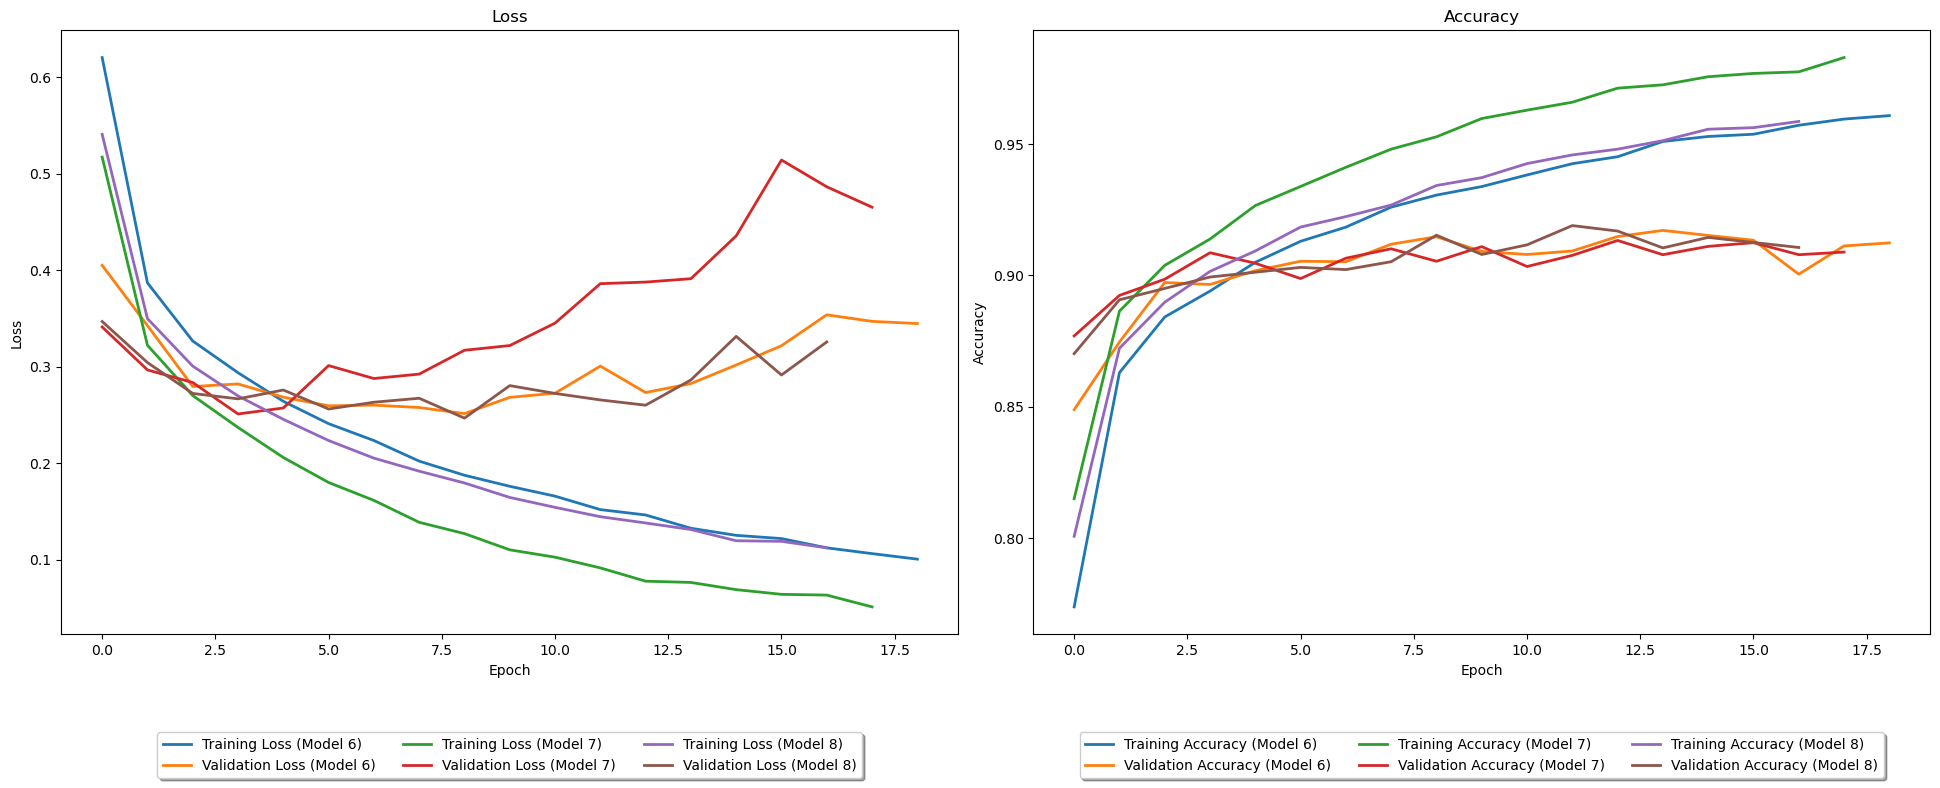

In [86]:
# Plotting the training and validation loss for Model 6, 7 and 8
plt.figure(figsize=(20, 8))

# Plotting the loss
plt.subplot(1, 2, 1)
for history, label in zip([history_6, history_7, history_8], ['Model 6', 'Model 7', 'Model 8']):
    plt.plot(history.history['loss'], label=f'Training Loss ({label})', linewidth=2.0)
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({label})', linewidth=2.0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.title('Loss')

# Plotting the accuracy
plt.subplot(1, 2, 2)
for history, label in zip([history_6, history_7, history_8], ['Model 6', 'Model 7', 'Model 8']):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy ({label})', linewidth=2.0)
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({label})', linewidth=2.0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.title('Accuracy')

# Setting the layout for readability so the plots are in one row
plt.tight_layout()
plt.show()